# <font color = yellow> The "hybrid" notebook" 

#### Requirements to use R code in the python notebook
    
    !pip install rpy2

    import os
    os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.0'  # Adjust this path to your R installation

    %reload_ext rpy2.ipython


    https://search.r-project.org/R/refmans/base/html/00Index.html

In [1]:
# https://www.kaggle.com/code/vktsyp/xgboost-bayesian-optimization-insurance

In [2]:

!pip install rpy2

import os
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.0'  # Adjust this path to your R installation

%reload_ext rpy2.ipython


C:\all_programming\Kaggle\venv\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
%%R
df <- data.frame(
    Num = c(1,2,3), 
    Name = c("Able", "Bravo", "Charlie")
    )

str(df)
print(df)

'data.frame':	3 obs. of  2 variables:
 $ Num : num  1 2 3
 $ Name: chr  "Able" "Bravo" "Charlie"
  Num    Name
1   1    Able
2   2   Bravo
3   3 Charlie


In [4]:
%%R
options(scipen = 999)
library(dplyr)

R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [6]:
%%R
# Load the test dataset
test_path <- "C:\\all_programming\\Kaggle\\datasets\\test\\test.csv"
test <- read.csv(test_path, stringsAsFactors = FALSE)
dim(test)   # has empty fields

train_path <- "C:\\all_programming\\Kaggle\\datasets\\train\\train.csv"
train <- read.csv(train_path, stringsAsFactors = FALSE)
dim(train)


[1] 1200000      21


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv("C:/all_programming/Kaggle/datasets/train/train.csv")
test = pd.read_csv("C:/all_programming/kaggle/datasets/test/test.csv")

In [9]:

train.tail().T

,1199995,1199996,1199997,1199998,1199999
id,1199995,1199996,1199997,1199998,1199999
Age,36.0,54.0,19.0,55.0,21.0
Gender,Female,Male,Male,Male,Female
Annual Income,27316.0,35786.0,51884.0,NaN,NaN
Marital Status,Married,Divorced,Divorced,Single,Divorced
Number of Dependents,0.0,NaN,0.0,1.0,0.0
Education Level,Master's,Master's,Master's,PhD,PhD
Occupation,Unemployed,Self-Employed,NaN,NaN,NaN
Health Score,13.772907,11.483482,14.724469,18.547381,10.125323
Location,Urban,Rural,Suburban,Suburban,Rural


In [10]:
# Extract the Target Column
target_column = (set(train.columns) - set(test.columns)).pop()

print(f"Target column: {target_column}")
print(f"Data type: {train[target_column].dtype}")

Target column: Premium Amount
Data type: float64


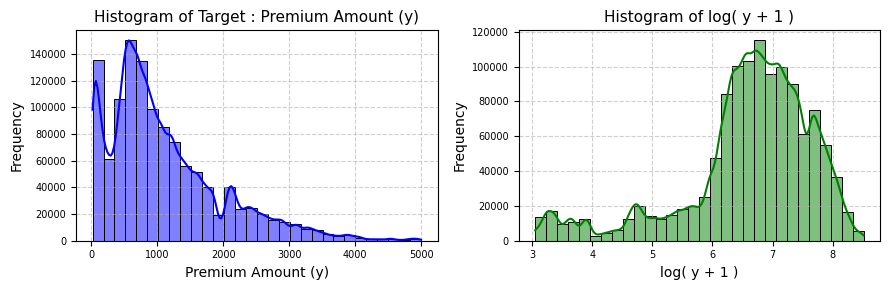

In [11]:
# Original target column
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
sns.histplot(train[target_column], kde=True, bins=30, color='blue')
plt.title(f'Histogram of Target : {target_column} (y)', fontsize=11)
plt.xlabel(f'{target_column} (y)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.grid(True, linestyle='--', alpha=0.6)

# log(y_train + 1)
y_train_log = np.log1p(train[target_column])
plt.subplot(1, 2, 2)
sns.histplot(y_train_log, kde=True, bins=30, color='green')
plt.title(f'Histogram of log( y + 1 )', fontsize=11)
plt.xlabel(f'log( y + 1 )', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [13]:
# Retrieve columns with 'object' data type
datetime_columns = train.select_dtypes(include=['object']).columns

for col in datetime_columns:
    try:
        # Convert the column to datetime format
        train[col] = pd.to_datetime(train[col], errors='raise')
        test[col] = pd.to_datetime(test[col], errors='raise')
        
        # Convert datetime to epoch time
        train[col] = train[col].astype(np.int64) / 10**9
        test[col] = test[col].astype(np.int64) / 10**9

        print(f"Converted '{col}' to epoch time.")
    except Exception:
        continue

Converted 'Policy Start Date' to epoch time.


In [14]:
train.tail().T

,1199995,1199996,1199997,1199998,1199999
id,1199995,1199996,1199997,1199998,1199999
Age,36.0,54.0,19.0,55.0,21.0
Gender,Female,Male,Male,Male,Female
Annual Income,27316.0,35786.0,51884.0,NaN,NaN
Marital Status,Married,Divorced,Divorced,Single,Divorced
Number of Dependents,0.0,NaN,0.0,1.0,0.0
Education Level,Master's,Master's,Master's,PhD,PhD
Occupation,Unemployed,Self-Employed,NaN,NaN,NaN
Health Score,13.772907,11.483482,14.724469,18.547381,10.125323
Location,Urban,Rural,Suburban,Suburban,Rural


In [15]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [16]:
# Function to highlight missing values in the DataFrame
def highlight_missing(val):
    if pd.isna(val):
        # Apply styling for missing values
        return 'background-color: SkyBlue; border: 1px solid red'
    else:
        return ''

# Identify columns with missing values
columns_with_issues = train.columns[train.isnull().sum() > 0]

# Select representative rows with missing values for each column
representative_rows = pd.concat(
    [train[train[col].isnull()].iloc[:1] for col in columns_with_issues]
).drop_duplicates()

# Apply styling to highlight missing values in the selected rows
styled_df = representative_rows.T.style.applymap(highlight_missing)

# Display the styled DataFrame
display(styled_df)

,83,22,45,14,1,6,11,15629,2,711358,28
id,83,22,45,14,1,6,11,15629,2,711358,28
Age,nan,22.000000,61.000000,40.000000,39.000000,41.000000,23.000000,25.000000,23.000000,64.000000,43.000000
Gender,Male,Male,Male,Female,Female,Male,Male,Female,Male,Male,Male
Annual Income,645.000000,nan,5095.000000,23897.000000,31678.000000,40336.000000,30983.000000,638.000000,25602.000000,30206.000000,1060.000000
Marital Status,Single,Divorced,nan,Divorced,Divorced,Married,Single,Divorced,Divorced,Married,Married
Number of Dependents,3.000000,4.000000,3.000000,nan,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,nan
Education Level,PhD,PhD,Master's,High School,Master's,PhD,Master's,PhD,High School,Master's,Master's
Occupation,Employed,nan,Employed,Self-Employed,nan,nan,nan,Employed,Self-Employed,Employed,Self-Employed
Health Score,30.766284,25.583790,40.886124,29.082036,15.569731,nan,5.813129,13.494674,47.177549,49.551038,41.376716
Location,Urban,Urban,Suburban,Suburban,Rural,Rural,Urban,Suburban,Suburban,Suburban,Suburban


## GS... remove the ID variable from both datasets.

In [17]:

# Remove the 'ID' column from both train and test DataFrames
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# Verify the changes
print(train.head())
print(test.head())


    Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  19.0  Female        10049.0        Married                   1.0   
1  39.0  Female        31678.0       Divorced                   3.0   
2  23.0    Male        25602.0       Divorced                   3.0   
3  21.0    Male       141855.0        Married                   2.0   
4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's            NaN     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's            NaN     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0        

In [18]:
# Fill missing values in numeric columns
numeric_columns = train.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col in test.columns:
        median_value = train[col].median()  # Calculate the median
        train[col].fillna(median_value, inplace=True)
        test[col].fillna(median_value, inplace=True)

# Fill missing values in object columns
object_columns = train.select_dtypes(include=['object']).columns
for col in object_columns:
    if col in test.columns:
        train[col].fillna("Unknown", inplace=True)
        test[col].fillna("Unknown", inplace=True)

In [19]:
train.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [20]:
from sklearn.preprocessing import OrdinalEncoder
# import pandas as pd

# Initialize the OrdinalEncoder
oe = OrdinalEncoder()

# Get object type columns
object_columns = train.select_dtypes(include=['object']).columns

# Combine the training and testing data for fitting
combined_data = pd.concat([train[object_columns], test[object_columns]])

# Fit the OrdinalEncoder on the combined data
oe.fit(combined_data)

# Transform the training and testing data
train[object_columns] = oe.transform(train[object_columns])
test[object_columns] = oe.transform(test[object_columns])



In [21]:
train.dtypes

Age                     float64
Gender                  float64
Annual Income           float64
Marital Status          float64
Number of Dependents    float64
Education Level         float64
Occupation              float64
Health Score            float64
Location                float64
Policy Type             float64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date       float64
Customer Feedback       float64
Smoking Status          float64
Exercise Frequency      float64
Property Type           float64
Premium Amount          float64
dtype: object

In [22]:
# Select numerical columns
numerical_columns = train.select_dtypes(include=['float64']).columns
numerical_columns = numerical_columns[numerical_columns != target_column]

# Applying Normalization
scaler = StandardScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])

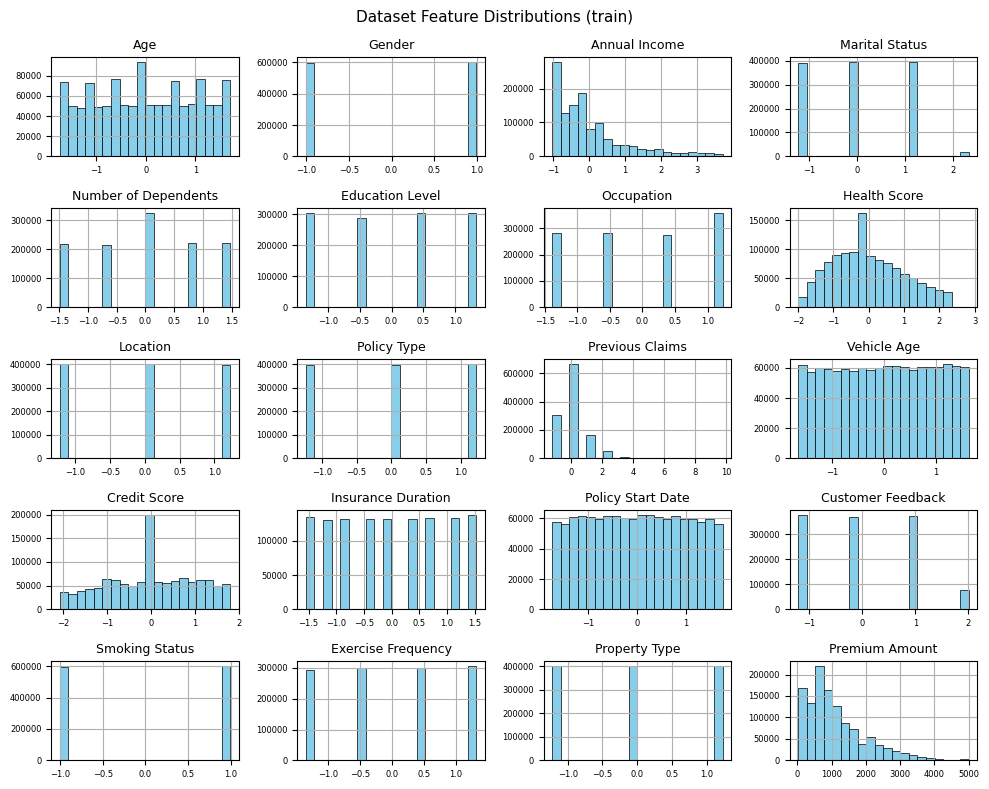

In [23]:
# Dataset Feature Distributions (train)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 8))
columns_to_plot = train.columns
for i, column in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    train[column].hist(ax=ax, bins=20, color='skyblue', edgecolor='black', linewidth=0.5)
    ax.set_title(column, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=6)
plt.suptitle('Dataset Feature Distributions (train)', fontsize=11)
plt.tight_layout()
plt.show()

In [24]:
# Prepare training data
X_train = train.drop([target_column], axis=1)
y_train = train[target_column]
y_train_log = np.log1p(y_train)

display(X_train.dtypes, y_train.dtypes, y_train_log.dtypes)

Age                     float64
Gender                  float64
Annual Income           float64
Marital Status          float64
Number of Dependents    float64
Education Level         float64
Occupation              float64
Health Score            float64
Location                float64
Policy Type             float64
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date       float64
Customer Feedback       float64
Smoking Status          float64
Exercise Frequency      float64
Property Type           float64
dtype: object

dtype('float64')

dtype('float64')

In [25]:
# Initialize the XGBoost regressor model
model = XGBRegressor(random_state=42)

# Hyperparameters for BayesSearchCV tuning
search_spaces = {
    'n_estimators': (10, 200),      
    'max_depth': (3, 10),            
    'reg_alpha': (0.001, 0.2, 'log-uniform'),  
    'reg_lambda': (0.1, 100, 'log-uniform')     
}

# Set up BayesSearchCV for hyperparameter tuning
search = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=50,          # Number of iterations for optimization
    cv=5,               # k-fold cross-validation
    verbose=1,          # Display detailed logs
    scoring="neg_root_mean_squared_error",
    random_state=42     
)

# Perform the Bayesian optimization with cross-validation
search.fit(X_train, y_train_log)

print("Best params: ", search.best_params_)
print("Best RMSLE: ", -search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [26]:
# Train target value prediction

y_train_pred_log = search.predict(X_train)      # log(y+1)
y_train_pred = np.expm1(y_train_pred_log)

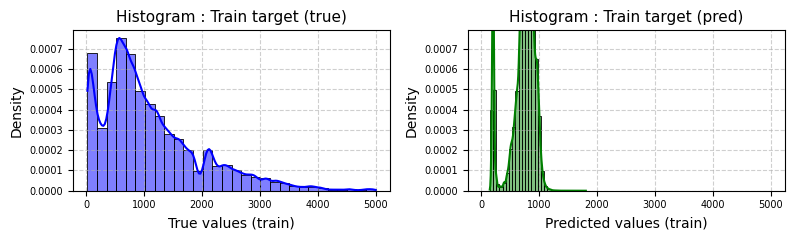

In [27]:
# Histogram of Target Variable

def plot_histogram(data, title, xlabel, color, x_limits=None, y_limits=None):
    sns.histplot(data, kde=True, bins=30, color=color, stat='density')
    plt.title(title, fontsize=11)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.grid(True, linestyle='--', alpha=0.6)
    if x_limits:
        plt.xlim(x_limits)
    if y_limits:
        plt.ylim(y_limits)

plt.figure(figsize=(12, 2.5))

# Plot 1: True values (train)
plt.subplot(1, 3, 1)
plot_histogram(y_train, title='Histogram : Train target (true)', xlabel='True values (train)', color='blue')
x_limits = plt.gca().get_xlim()
y_limits = plt.gca().get_ylim()

# Plot 2: Predicted values (train)
plt.subplot(1, 3, 2)
plot_histogram(y_train_pred, title='Histogram : Train target (pred)', 
               xlabel='Predicted values (train)', color='green', x_limits=x_limits, y_limits=y_limits)

plt.tight_layout()
plt.show()


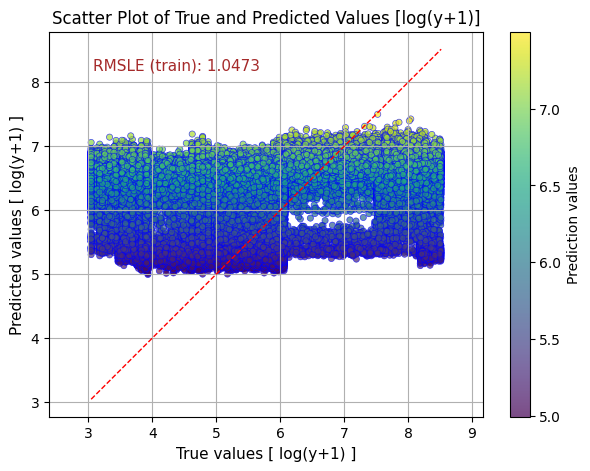

In [28]:

# Scatter Plot of True and Predicted Values [log(y+1)]
y_true = y_train_log
y_pred = y_train_pred_log

# Plot preparation
plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, c=y_pred, cmap='viridis', edgecolors='blue', s=20, alpha=0.7, linewidth=0.5)
cb = plt.colorbar()
cb.set_label('Prediction values')

# Plot the diagonal line
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=1.0)
plt.axis('equal')

# Add RMSLE text to the plot
rmsle_text = f'RMSLE (train): {round(-search.best_score_, 4)}'
plt.text(0.10, 0.90, rmsle_text, transform=plt.gca().transAxes, fontsize=11, color='brown')

# Labels and title
plt.xlabel('True values [ log(y+1) ]', fontsize=11)
plt.ylabel('Predicted values [ log(y+1) ]', fontsize=11)
plt.title('Scatter Plot of True and Predicted Values [log(y+1)]', fontsize=12)
plt.grid(True)
plt.show()

In [29]:
# Test target value prediction

y_test_pred_log = search.predict(test)      # log(y+1)
y_test_pred = np.expm1(y_test_pred_log)

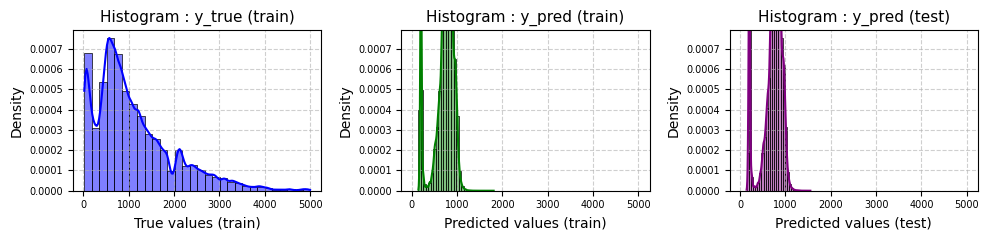

In [30]:
# Histogram of Target Variable

def plot_histogram(data, title, xlabel, color, x_limits=None, y_limits=None):
    sns.histplot(data, kde=True, bins=30, color=color, stat='density')
    plt.title(title, fontsize=11)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.grid(True, linestyle='--', alpha=0.6)
    if x_limits:
        plt.xlim(x_limits)
    if y_limits:
        plt.ylim(y_limits)

plt.figure(figsize=(10, 2.5))

# Plot 1: True values (train)
plt.subplot(1, 3, 1)
plot_histogram(y_train, title='Histogram : y_true (train)', xlabel='True values (train)', color='blue')
x_limits = plt.gca().get_xlim()
y_limits = plt.gca().get_ylim()

# Plot 2: Predicted values (train)
plt.subplot(1, 3, 2)
plot_histogram(y_train_pred, title='Histogram : y_pred (train)', 
               xlabel='Predicted values (train)', color='green', x_limits=x_limits, y_limits=y_limits)

# Plot 3: Predicted values (test)
plt.subplot(1, 3, 3)
plot_histogram(y_test_pred, title='Histogram : y_pred (test)', 
               xlabel='Predicted values (test)', color='purple', x_limits=x_limits, y_limits=y_limits)

plt.tight_layout()
plt.show()

In [48]:
%%R
# Load the test dataset
# test_path <- "C:\\all_programming\\Kaggle\\datasets\\test\\test.csv"
# test <- read.csv(test_path, stringsAsFactors = FALSE)
# dim(test)   # has empty fields

# train_path <- "C:\\all_programming\\Kaggle\\datasets\\train\\train.csv"
# train <- read.csv(train_path, stringsAsFactors = FALSE)
# dim(train)


df <- read.csv(file = "submission.csv")
dim(df)
tail(df)

           id Premium.Amount
799995 799995         865.93
799996 799996        1026.21
799997 799997         555.35
799998 799998         776.32
799999 799999         834.16
800000 800000         781.62


In [49]:
%%R
df <- read.csv(file = "submission.csv") 
str(df)
head(df,3)

'data.frame':	800000 obs. of  2 variables:
 $ id            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Premium.Amount: num  871 754 794 817 743 ...
  id Premium.Amount
1  1         870.83
2  2         754.32
3  3         793.50


In [54]:


# Load the test dataset
test = pd.read_csv("C:/all_programming/kaggle/datasets/test/test.csv")

# Ensure y_test_pred contains the predicted values (assumed to be available in your environment)
# y_test_pred = <your_predictions_here>

# Create the submission DataFrame with 14-character IDs
submission = pd.DataFrame({
    'id': test['id'].apply(lambda x: f"{x:014d}"),
    'Premium Amount': y_test_pred
})

# Round the Premium Amount to 2 decimal places
submission['Premium Amount'] = submission['Premium Amount'].round(2)

# Save the submission DataFrame to a CSV file
submission_path = "C:/all_programming/Kaggle/datasets/submission/submission.csv"
submission.to_csv(submission_path, index=False)

# Verify the structure and first few rows
print(submission.head(3))


               id  Premium Amount
0  00000001200000      870.830017
1  00000001200001      754.320007
2  00000001200002      793.500000


### <font color = yellow> Submission Complete - 1m ago

    - Submission Details 
        submission.csv Complete · 1m ago 
    - Score: 1.04633 Uploaded files
    - Current Standing: 332 of 1381 submissions